In [1]:
#подключаю гуглдиск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import frameworks
import pandas as pd
import seaborn as sns
from sklearn import tree #импортируем библиотеку с деревьями

In [3]:
#Загрузка наших данных
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')

In [4]:
#в этой задаче оставляем большее количество данных
df_cut=df[['Year of birth', 'Month of birthday', 'Age']]
df_cut=df_cut.dropna()

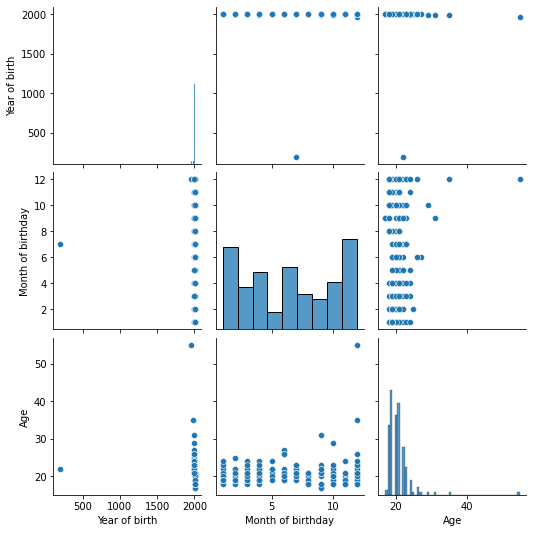

In [5]:
sns.pairplot(df_cut)

In [12]:
model=tree.DecisionTreeRegressor(max_depth=3) #Указываем другое название модели ИИ
model.fit(df_cut[['Year of birth', 'Month of birthday']].values.reshape(-1,2), y=df_cut['Age'].values)

DecisionTreeRegressor(max_depth=3)

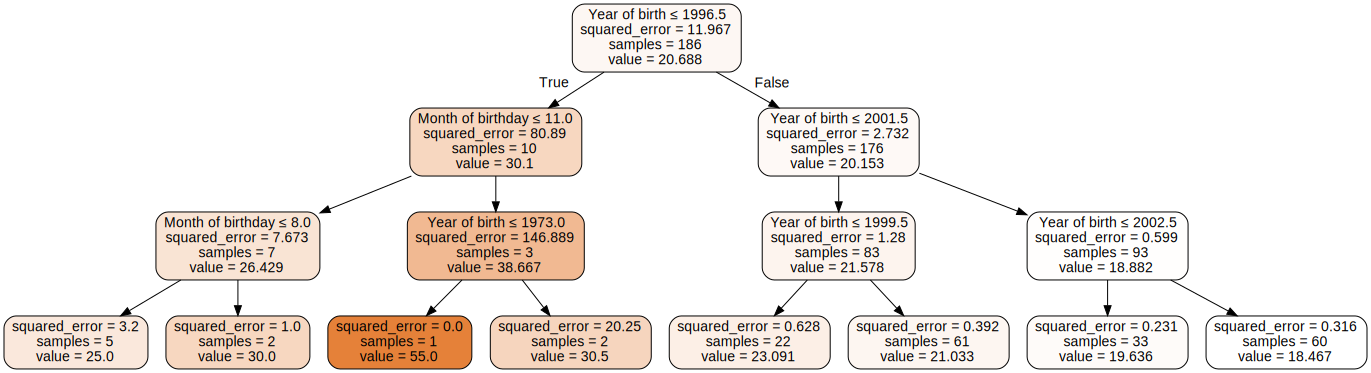

In [13]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=['Year of birth', 'Month of birthday'],
                                class_names=['f', 'm'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [14]:
# загружаем данные тестовой выборки
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Year of birth', 'Month of birthday','Age']]
df_test_cut=df_test_cut.dropna() #удаляем данные, имеющие пустые значения

In [15]:
#Преимущества деревьев в том, что нам нет неободимости нормировать данные
df_test_cut['Predicted']=model.predict(df_test_cut[['Year of birth', 'Month of birthday']].values.reshape(-1,2))

In [16]:
from sklearn.metrics import mean_absolute_error #В модели регрессии используется данная метрика качества
mean_absolute_error(df_test_cut['Age'], df_test_cut['Predicted'])

0.7241329318612689